# Costar data analysis & Multi-Family index prediction

This script can be broadly distributed into three parts
1) Data Cleaning </br>
2) Data Visualization </br>
3) Machine Learning Models

## Data Cleaning

In [2]:
#Importing necessary Libraries
import pandas as pd
import numpy as np

In [28]:
#Importing Data
df = pd.read_csv('/Users/semyonleontyev/Documents/UCI/Capstone/Avanath/need/MSA_index.csv')

In [29]:
df.head()

Property Class Name     Date  Year  No_quarter year_qtr Geography Name   
0        Multi-Family   1/1/13  2013           1  2013 Q1   Abilene - TX  \
1        Multi-Family   4/1/13  2013           2  2013 Q2   Abilene - TX   
2        Multi-Family   7/1/13  2013           3  2013 Q3   Abilene - TX   
3        Multi-Family  10/1/13  2013           4  2013 Q4   Abilene - TX   
4        Multi-Family   1/1/14  2014           1  2014 Q1   Abilene - TX   

   CBSA Code Property Type Forecast Scenario Geography Type  ... Total Return   
0      10180  Multi-Family         Base Case          Metro  ...      0.12000  \
1      10180  Multi-Family         Base Case          Metro  ...      0.12000   
2      10180  Multi-Family         Base Case          Metro  ...      0.10000   
3      10180  Multi-Family         Base Case          Metro  ...      0.09000   
4      10180  Multi-Family         Base Case          Metro  ...      0.09000   

  Total Sales Volume  Transaction Sale Price/Unit   
0     17000000.00000                  81731.00000  \
1            0.00000                          NaN   
2            0.00000                          NaN   
3     10000000.00000                  56818.00000   
4            0.00000                          NaN   

   Under Construction Buildings Under Construction Units Vacancy Rate   
0                             0                        0      0.08000  \
1                             0                        0      0.08000   
2                             0                        0      0.08000   
3                             0                        0      0.09000   
4                             0                        0      0.11000   

  Rent Burden  National index  National index growth rate  d_index_growth  
0     0.17500       167.89500                     0.01570        -0.00070  
1     0.17700       170.84700                     0.01758        -0.00758  
2     0.17600       174.84300                     0.02339        -0.02139  
3     0.17600       179.58500                     0.02712        -0.01912  
4     0.17700       178.10500                    -0.00824         0.02224  

[5 rows x 68 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Property Class Name                 15600 non-null  object 
 1   Date                                15600 non-null  object 
 2   Year                                15600 non-null  int64  
 3   No_quarter                          15600 non-null  int64  
 4   year_qtr                            15600 non-null  object 
 5   Geography Name                      15600 non-null  object 
 6   CBSA Code                           15600 non-null  int64  
 7   Property Type                       15600 non-null  object 
 8   Forecast Scenario                   15600 non-null  object 
 9   Geography Type                      15600 non-null  object 
 10  Geography Code                      15600 non-null  object 
 11  Absorption %                        15600

In [31]:
#Keep only necessary columns 
df = df.filter(items = ['Market Sale Price Index','Median Household Income','Market Cap Rate',
               'Population','Existing Buildings','Gross Delivered Buildings', 
               'Households','Rent Burden','National index','Industrial Employment',
                'Office Employment','Total Employment'], axis=1)

In [32]:
df['Office_perc'] = df['Office Employment']/df['Total Employment']
df['Ind_perc'] = df['Industrial Employment']/df['Total Employment']
df['Emp_perc'] = df['Total Employment']/df['Population']
df['Emp__house_perc'] = df['Total Employment']/df['Households']
df['Pop_cat'] = pd.cut(df['Population'], bins=[0, 4965666.67, 9931333.33, 15000000], 
                       labels=['low_pop', 'medium_pop', 'high_pop'])


In [33]:
pd.options.display.float_format = '{:.5f}'.format

In [34]:
df['Population'].describe()

count      15600.00000
mean      718363.21276
std      1409093.74692
min        54604.00000
25%       146080.50000
50%       254755.00000
75%       608040.50000
max     14897000.00000
Name: Population, dtype: float64

In [45]:
df.head()

Market Sale Price Index  Median Household Income  Market Cap Rate   
0                140.70000                    43598          0.08000  \
1                142.10000                    43931          0.08000   
2                142.40000                    44249          0.08000   
3                143.60000                    44149          0.08000   
4                145.60000                    44065          0.08000   

   Population  Existing Buildings  Gross Delivered Buildings  Households   
0      168660                  62                          0       62625  \
1      168757                  62                          0       62793   
2      168867                  62                          0       62967   
3      169184                  62                          0       62828   
4      169510                  62                          0       62694   

   Rent Burden  National index  Industrial Employment  Office Employment   
0      0.17500       167.89500                   8261               8976  \
1      0.17700       170.84700                   8420               9269   
2      0.17600       174.84300                   8358               9203   
3      0.17600       179.58500                   8507               9141   
4      0.17700       178.10500                   8514               9062   

   Total Employment  Office_perc  Ind_perc  Emp_perc  Emp__house_perc  Pop_cat  
0             66310      0.13536   0.12458   0.39316          1.05884  low_pop  
1             66812      0.13873   0.12603   0.39591          1.06400  low_pop  
2             66684      0.13801   0.12534   0.39489          1.05903  low_pop  
3             67097      0.13624   0.12679   0.39659          1.06795  low_pop  
4             67133      0.13499   0.12682   0.39604          1.07080  low_pop

## EDA

In this section we will explore the data

In [36]:
import plotly
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import folium
import plotly.express as px
import seaborn as sns

In [37]:
cf.go_offline()

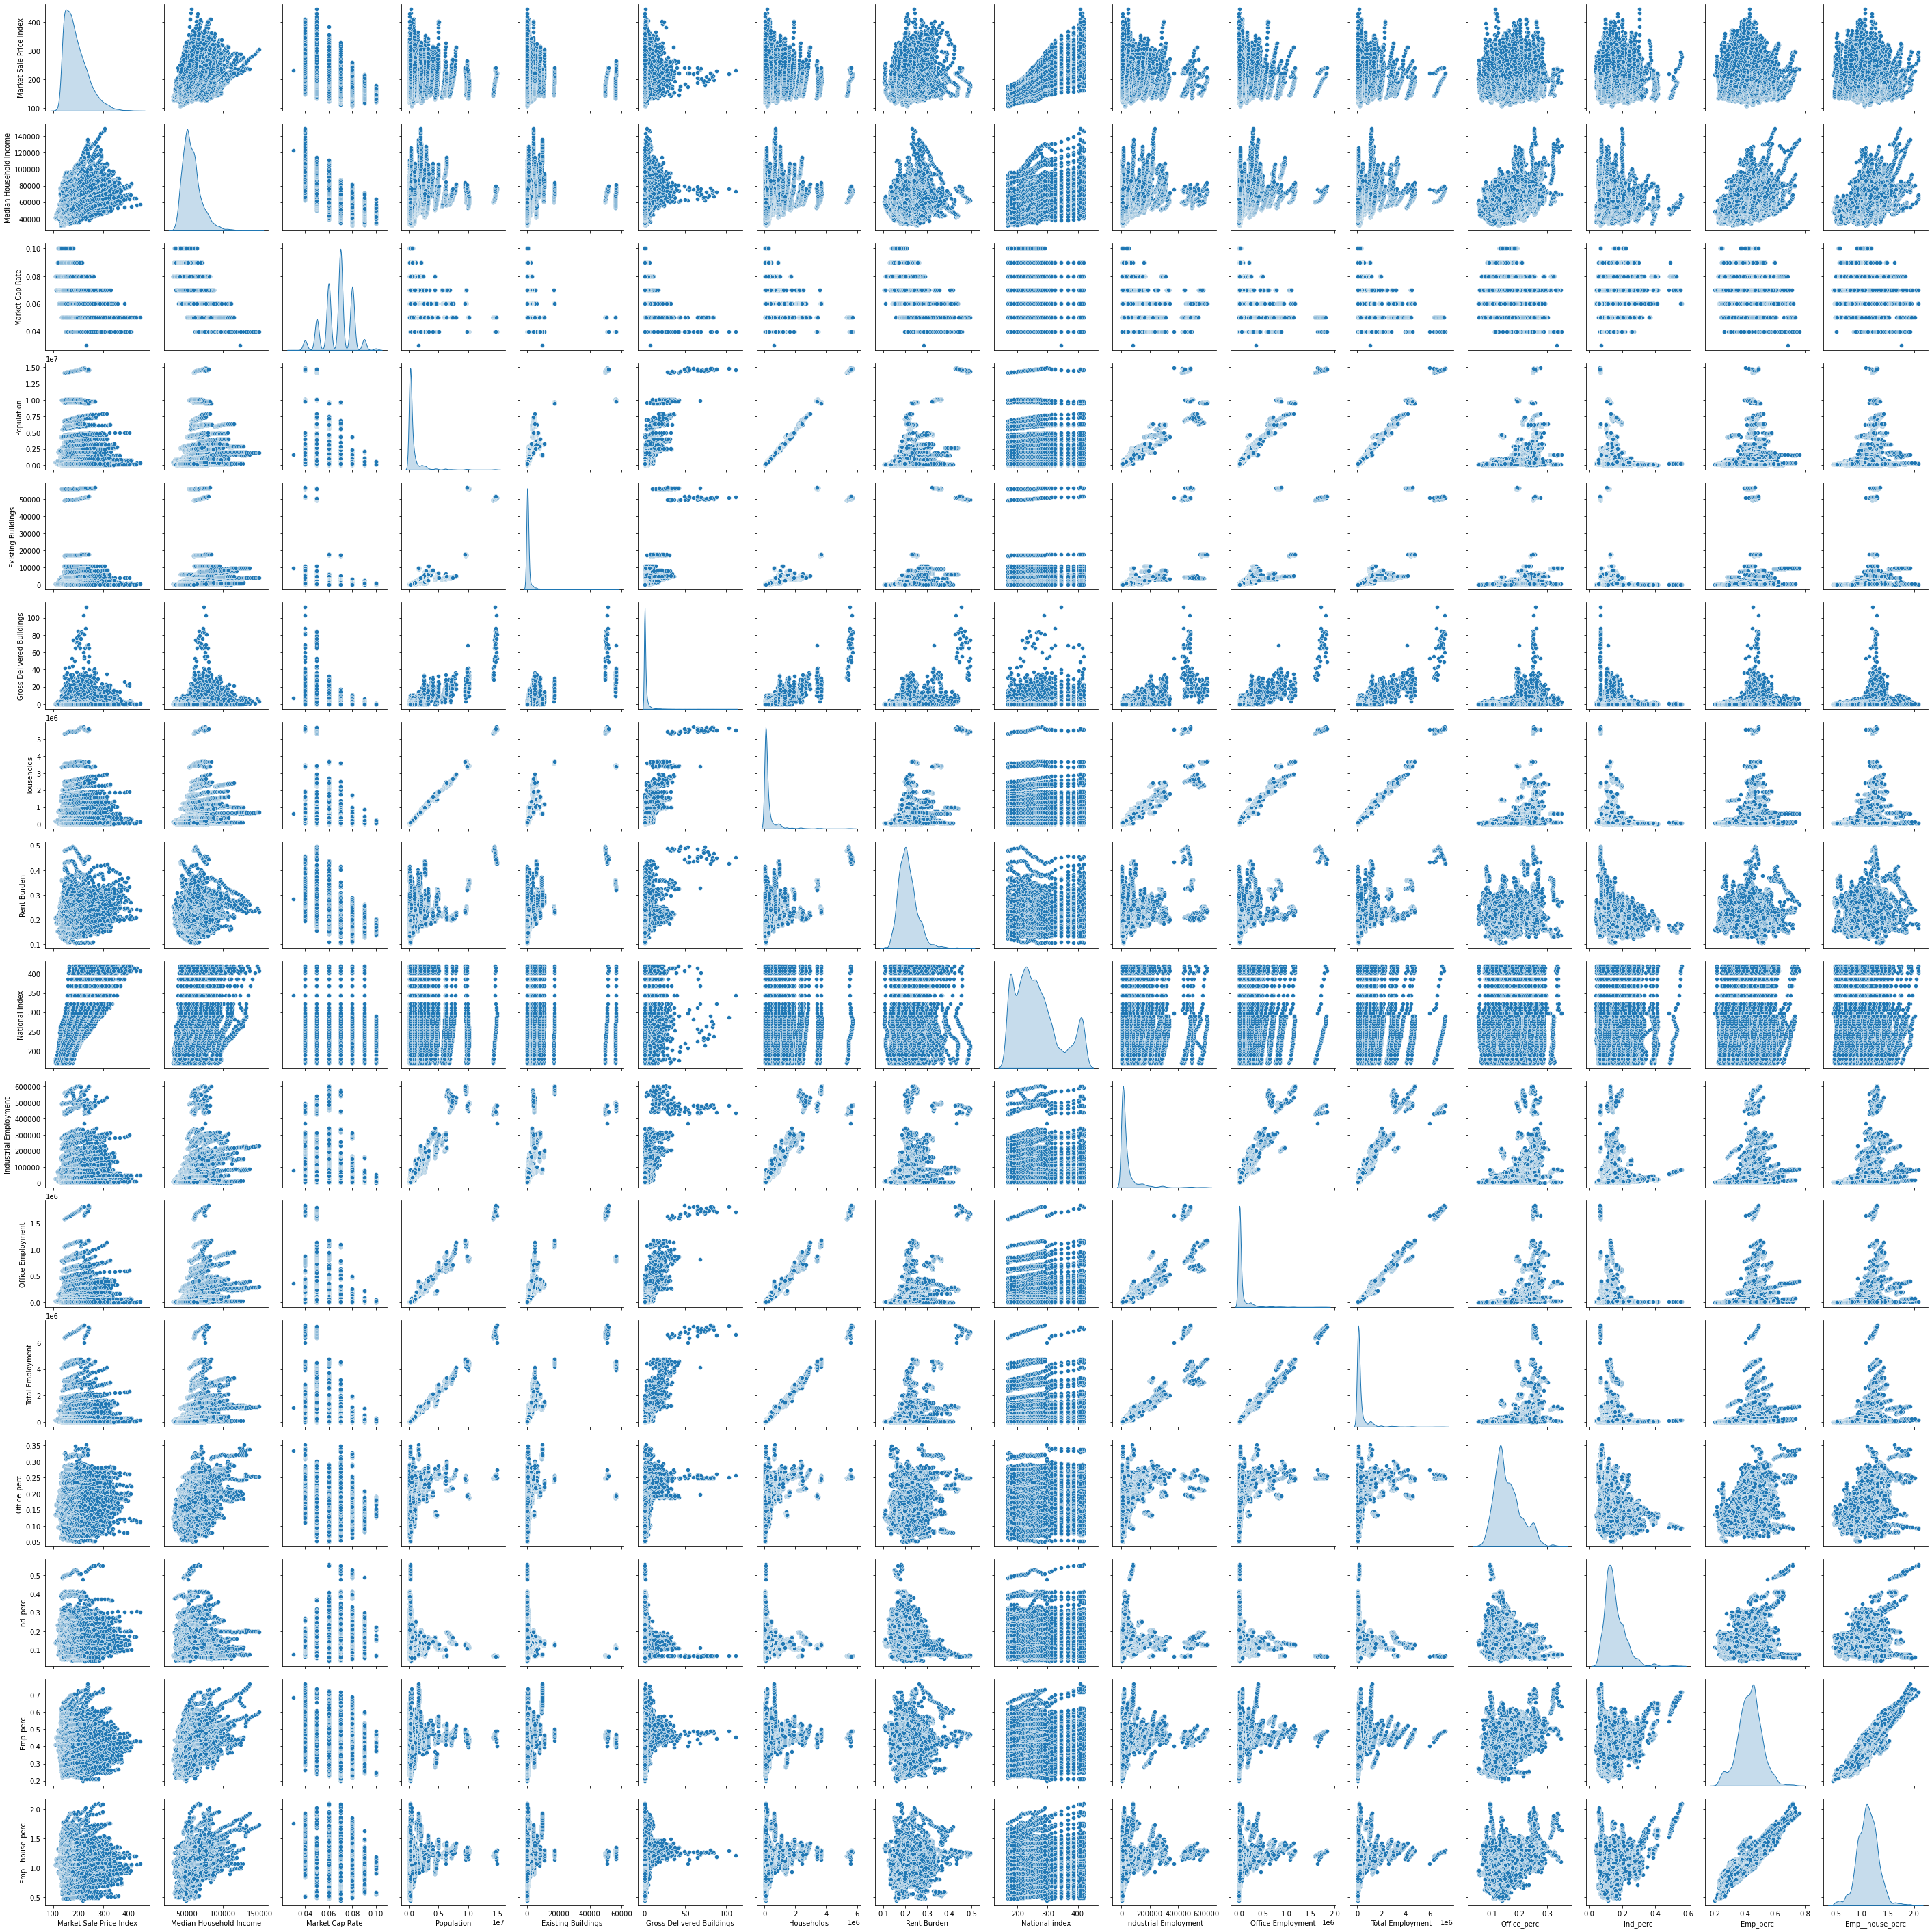

In [38]:
sns.pairplot(df, diag_kind="kde")
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

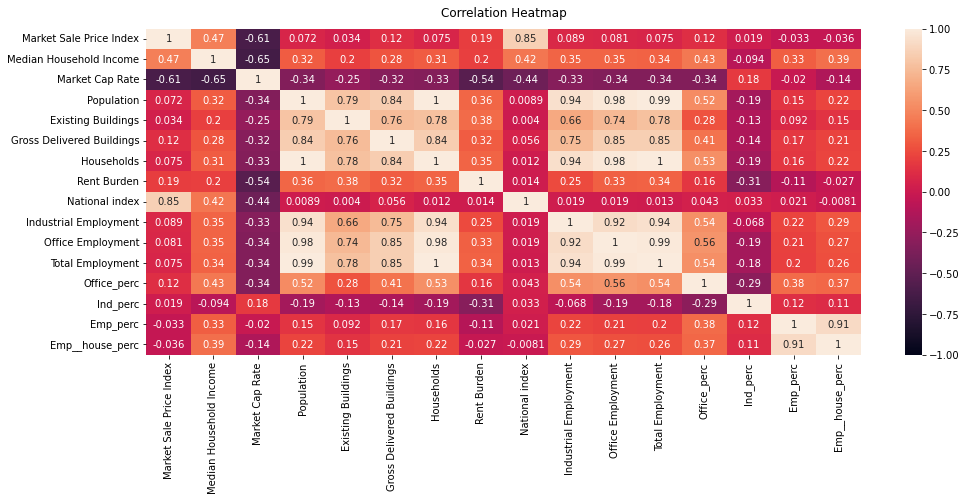

In [42]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.iloc[:,0:16].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Features Correlating with Market Sale Price Index')

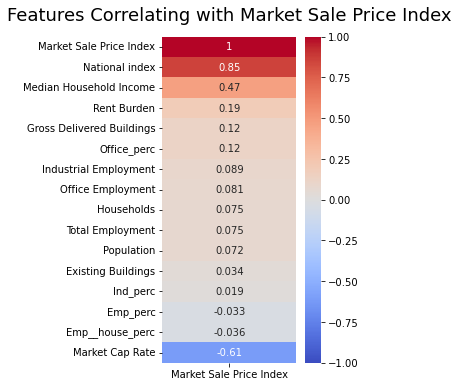

In [43]:
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(df.iloc[:,0:16].corr()[['Market Sale Price Index']].sort_values(by='Market Sale Price Index', 
                               ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Market Sale Price Index', fontdict={'fontsize':18}, pad=16)

From the correlation matrix we can assume that Market Sales price index for multi-family houses is correlated to National average index (which is understandable) and Median Household Income. 